In [18]:
# Load to Data from CSV file
import pandas as pd

data = pd.read_csv('../Data/healthcare-dataset-stroke-data.csv')
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [19]:
# Phase 1: EDA and Data cleaning
# check data types and missing values
data.info()

# print the column names
print("\n",data.columns)

<class 'pandas.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   str    
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   str    
 6   work_type          5110 non-null   str    
 7   Residence_type     5110 non-null   str    
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   str    
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), str(5)
memory usage: 479.2 KB

 Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 

In [20]:
# check missing values
print("\n",data.isna().sum())


 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

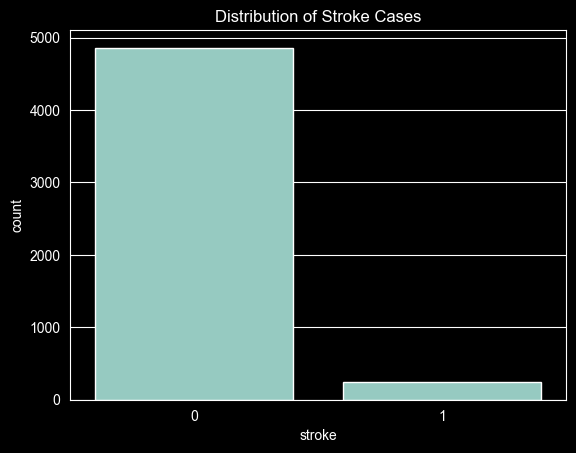

In [22]:
# Target Distribution
sns.countplot(x='stroke', data=data)
plt.title('Distribution of Stroke Cases')
plt.show()

මෙතැනදී ඔයාට පෙනෙයි "Stroke නැති" අය (0) ගොඩක් වැඩියි සහ "Stroke ඇති" අය (1) හුඟක් අඩුයි කියලා. මේක Imbalanced Dataset එකක්. මේ වගේ වෙලාවට තමයි අපි Accuracy එකට වඩා Precision සහ Recall ගැන හිතන්න ඕනේ කියලා ඉගෙන ගත්තේ.

In [23]:
# 🛠️ Phase 2: Building the Preprocessing Pipeline
# Feature Matrix (X) and Target Vector (y)
X = data.drop(['id','stroke'], axis=1)
y = data['stroke']


In [24]:
# categorical features to dummy variables
X_encoded = pd.get_dummies(X, drop_first=True)

# check new shape columns
print("Original shape of X:", X.shape)
print("Encoded shape of X:", X_encoded.shape)
print("\nNew Columns in X_encoded:\n", X_encoded.columns)

X_encoded

Original shape of X: (5110, 10)
Encoded shape of X: (5110, 16)

New Columns in X_encoded:
 Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='str')


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,NaN,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,False,False,True,False,True,False,False,True,False,True,False
5106,81.0,0,0,125.20,40.0,False,False,True,False,False,True,False,True,False,True,False
5107,35.0,0,0,82.99,30.6,False,False,True,False,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.6,True,False,True,False,True,False,False,False,True,False,False


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [26]:
# steps for the pipeline
steps = [
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler()),  # Feature scaling
    ('logreg', LogisticRegression())  # Logistic Regression model
]

# create pipeline
pipeline = Pipeline(steps)


In [27]:
# 🚀 Phase 3: Train/Test Split and Pipeline Fit
from sklearn.model_selection import train_test_split

# 80% training and 20% testing
# stratify = y to maintain the same distribution of classes in both sets

X_train, X_test , y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (4088, 16)
Testing data shape: (1022, 16)


In [28]:
# train the pipeline
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. I

In [29]:
# check accuracy on the test set
accuracy = pipeline.score(X_test, y_test)
print(f"\nInitial Model Accuracy: {accuracy * 100:.2f}%")


Initial Model Accuracy: 95.21%


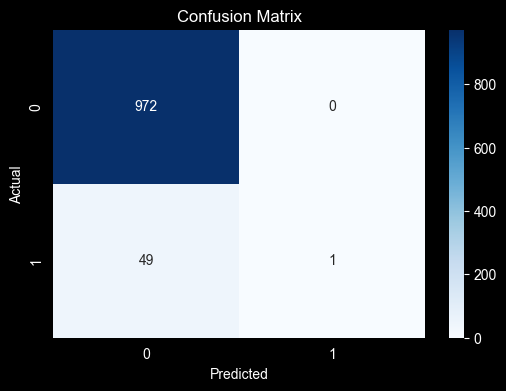


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022



In [30]:
# 🔍 Phase 4: Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report

# predict on the test set
y_pred = pipeline.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Heatmap of the confusion matrix

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

#### මේ Report එකේ තියෙන භයානකම තත්ත්වය මම පැහැදිලි කරන්නම්:

- Class 0 (ලෙඩේ නැති අය): ඒ පේළියේ Recall එක 1.00 (100%) යි. ඒ කියන්නේ ලෙඩේ නැති 972 දෙනාවම මොඩල් එක සාර්ථකව අඳුරගෙන තියෙනවා.

- Class 1 (ලෙඩේ ඇති අය - Stroke): මේ පේළියේ Recall එක 0.02 (2%) යි! මෙතන ලෙඩේ තියෙන රෝගීන් 50 දෙනෙක් ඉඳලා තියෙනවා (Support: 50). හැබැයි අපේ මොඩල් එක හොයාගෙන තියෙන්නේ ඉන් එක්කෙනෙක්ව (1) විතරයි! ඉතුරු 49 දෙනාටම "ඔයාට ලෙඩේ නැහැ" කියලා වැරදියට අනුමාන කරලා (False Negatives).

New classification report with balanced class weights:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022



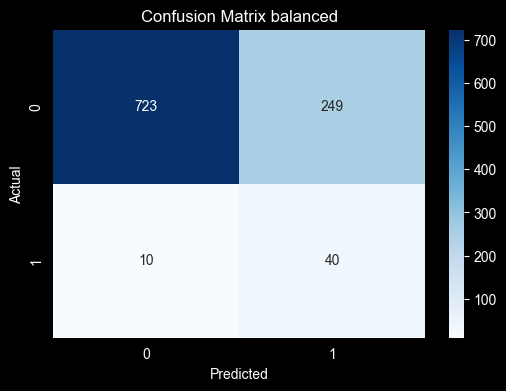

In [31]:
# 🛠️ Phase 5: The Fix (Class Weights)
# create pipeline with class weights
steps_balanced = [
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler()),  # Feature scaling
    ('logreg', LogisticRegression(class_weight='balanced', random_state=42))  # Logistic Regression with balanced class weights
]

# create new pipeline and train

pipeline_balanced = Pipeline(steps_balanced)
pipeline_balanced.fit(X_train, y_train)

# new prediction and report
y_pred_balanced = pipeline_balanced.predict(X_test)

print("New classification report with balanced class weights:\n", classification_report(y_test, y_pred_balanced))

cm_balanced = confusion_matrix(y_test, y_pred_balanced)
plt.figure(figsize=(6,4))
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix balanced')
plt.show()

In [35]:
# 🚀 Phase 6: Hyperparameter Tuning (The Final Polish)
from sklearn.model_selection import GridSearchCV
import numpy as np

# 1. පරීක්ෂා කළ යුතු Parameters ලැයිස්තුව (Param Grid)
# මතකයිනේ pipeline එක ඇතුලේ නම් කිරීමේදී 'logreg__' පාවිච්චි කළ යුතු බව
param_grid = {
    'logreg__C': np.logspace(-3, 3, 7),  # Regularization strength
    'logreg__solver': ['liblinear', 'lbfgs']  # Optimization algorithms
}

# 2. GridSearchCV object එක සෑදීම
# මෙහිදී අපි 'f1' score එක optimize කරන්න උත්සාහ කරමු (Precision සහ Recall දෙකේම එකතුවක් ලෙස)
grid_search = GridSearchCV(pipeline_balanced, param_grid, cv=5, scoring='f1')

# fit
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'logreg__C': np.float64(0.1), 'logreg__solver': 'lbfgs'}
Best F1 Score: 0.23522724136935375
